# Understanding K Nearest Neighbor Algorithm with Iris Dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()
print(iris.DESCR[:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



In [4]:
def get_iris_df():
    iris = load_iris()
    df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
    df['target'] = pd.Series(data=iris.target).apply(lambda x: iris.target_names[x])
    return df

In [7]:
X = iris.data
y = iris.target
df = get_iris_df()
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
149,5.9,3.0,5.1,1.8,virginica
36,5.5,3.5,1.3,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
106,4.9,2.5,4.5,1.7,virginica
82,5.8,2.7,3.9,1.2,versicolor


## Data Exploration

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### With Graphs

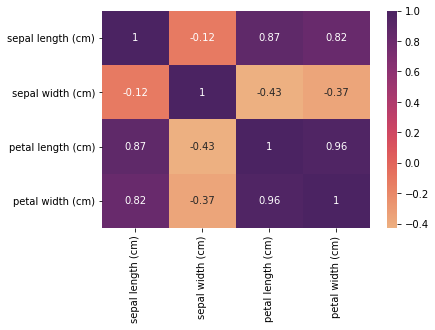

In [11]:
sns.heatmap(df.corr(), annot = True, cmap = 'flare')
plt.show()

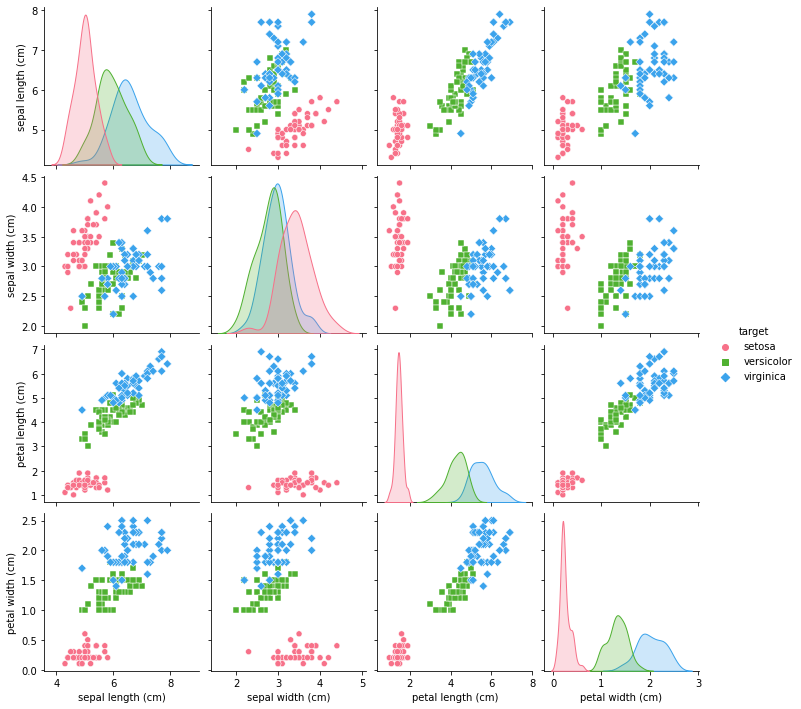

In [12]:
sns.pairplot(df, hue="target", palette="husl", markers=["o", "s", "D"])

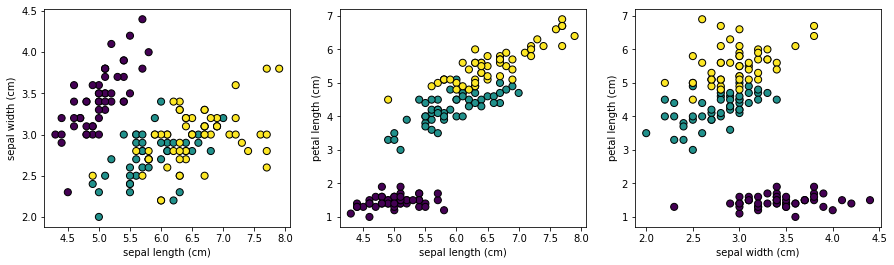

In [13]:
# Plot the training points
def plot_scatter(ax, ds1, ds2, target):
    ax.scatter(
        ds1, ds2, s=50, c=target, edgecolor='k')
    ax.set_xlabel(ds1.name)
    ax.set_ylabel(ds2.name)
    return ax

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
plot_scatter(ax1, df.iloc[:, 0], df.iloc[:, 1], iris.target)
plot_scatter(ax2, df.iloc[:, 0], df.iloc[:, 2], iris.target)
plot_scatter(ax3, df.iloc[:, 1], df.iloc[:, 2], iris.target)
plt.show()

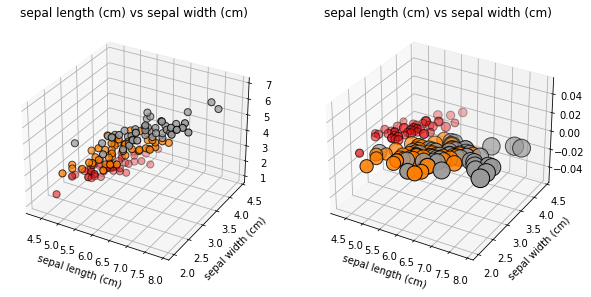

In [14]:
def plot_in_3d(dsx, dsy, target, dsz=0, size_array=50):
    ax.scatter3D(dsx, dsy, dsz, c=target,
            cmap=plt.cm.Set1, edgecolor='k', s = size_array)
    ax.set_xlabel(dsx.name)
    ax.set_ylabel(dsy.name)
    # ax.set_zlabel(dsz.name)
    ax.set_title("{} vs {}".format(dsx.name, dsy.name))
    return ax


fig = plt.figure(1, figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = plot_in_3d(
    df.iloc[:, 0], df.iloc[:, 1], iris.target, dsz=df.iloc[:, 2])
fig.add_axes(ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax = plot_in_3d(
    df.iloc[:, 0], df.iloc[:, 1], iris.target, size_array=df.iloc[:, 2] *50)
fig.add_axes(ax)

plt.show()

<AxesSubplot:>

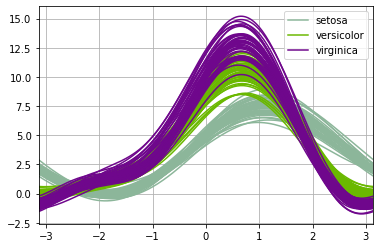

In [15]:
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
andrews_curves(df, "target")

<AxesSubplot:>

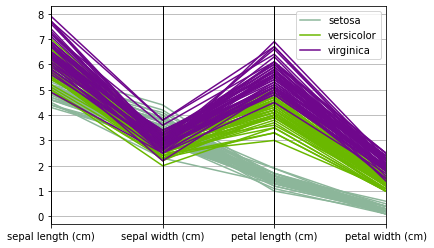

In [16]:
# plots each feature on a separate column & then draws lines
# connecting the features for each data sample
parallel_coordinates(df, "target")

<AxesSubplot:>

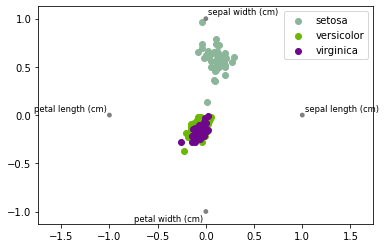

In [17]:
# puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
radviz(df, "target")

## Modeling and Metrics

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
y_pred = model.predict(X)
model.score(X, y)

0.96

In [16]:
metrics.accuracy_score(y_true=y, y_pred=y_pred)

0.96

In [22]:
conf_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_true=y, y_pred=y_pred),
    columns=zip(['Predicted'] * 3, iris.target_names), 
    index=zip(['Actual'] * 3, iris.target_names)
)
conf_matrix.columns = pd.MultiIndex.from_tuples(conf_matrix.columns)
conf_matrix.index = pd.MultiIndex.from_tuples(conf_matrix.index)
conf_matrix

Predicted                     
                     setosa versicolor virginica
Actual setosa            50          0         0
       versicolor         0         47         3
       virginica          0          3        47

How to interpret the classification report?

- Precision -> what fraction of positive predicitions are correct
- Recall -> what fraction of all positive instances does the classifier correctly indentify as positive
- F1 score -> convey the balance between the precision and the recall
- Support -> number of actual occurances of the class in the specified dataset

In [23]:
print(metrics.classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



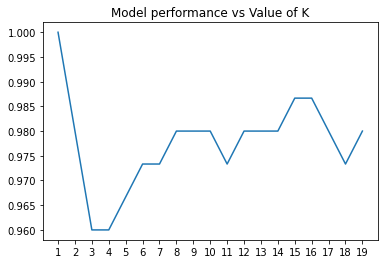

In [18]:
# Elbow method
scaley = []
error = []
x = list(range(1,20))
for i in x:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)
    scaley.append(model.score(X, y))
    error.append(np.mean(model.predict(X) != y))
plt.plot(x, scaley)
plt.xticks(x)
plt.title('Model performance vs Value of K')
plt.show()

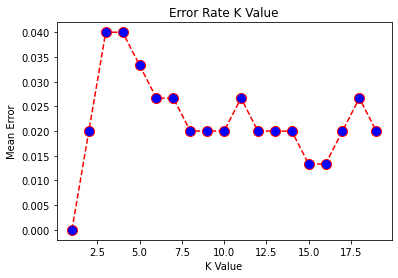

In [19]:
plt.figure()
plt.plot(x, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()